In [1]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
true = pd.read_csv('True.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake=pd.read_csv('Fake.csv')

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.shape

(23481, 4)

In [7]:
true.shape

(21417, 4)

In [8]:
true['label']=1
fake['label']=0

In [9]:
true.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [10]:
fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [11]:
news=pd.concat([fake,true])

In [12]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [13]:
news=news.drop(['title','subject','date'],axis=1)
news=news.sample(frac=1).reset_index(drop=True)

In [14]:
news.head()

,text,label
0,"LUCEDALE, Miss (Reuters) - Mississippi’s vast ...",1
1,Nothing says embracing diversity like dividing...,0
2,Donald Trump was involved at the highest level...,0
3,As droves of women come forward to tell of the...,0
4,WASHINGTON (Reuters) - The National Security A...,1


In [15]:
news.shape

(44898, 2)

**tf dif is used to extract with meanings**


In [16]:
import re

def wordopt(text):
    text = text.lower()  # convert to lowercase

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', ' ', text)

    return text.strip()


In [17]:
news['text']=news['text'].apply(wordopt)

In [18]:
X=news['text']
y=news['label']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(X_train)
xv_test=vectorization.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [22]:
LR.score(xv_train,y_train)

0.9930211148397826

In [23]:
LR.score(xv_test,y_test)

0.9894877505567928

LinearSVC

In [24]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(xv_train, y_train)


LinearSVC()

In [25]:
from sklearn.metrics import accuracy_score
# SVM
svm_pred = svm_model.predict(xv_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.9958129175946547


In [26]:
svm_model.score(xv_train,y_train)

0.9998515130816975

In [27]:
svm_model.score(xv_test,y_test)

0.9958129175946547

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # or 'gini'
    max_depth=100,         # limit tree depth to avoid overfitting
    random_state=42
)
dt_model.fit(xv_train, y_train)

# Predict on test data
dt_pred = dt_model.predict(xv_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9964365256124722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [29]:
dt_model.score(xv_train,y_train)

0.9999703026163395

In [30]:
dt_model.score(xv_test,y_test)

0.9964365256124722

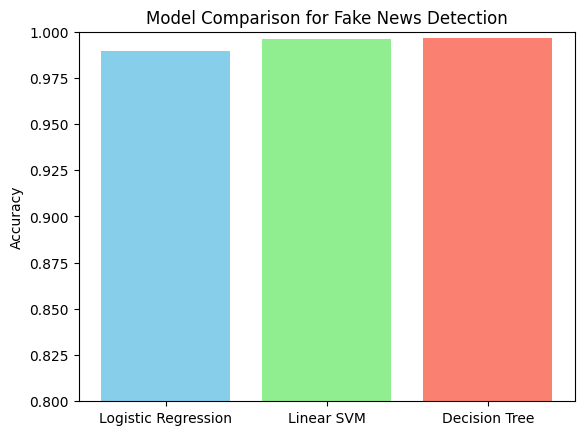

In [32]:
models = ['Logistic Regression', 'Linear SVM', 'Decision Tree']
scores = [LR.score(xv_test, y_test),
          svm_model.score(xv_test, y_test),
          dt_model.score(xv_test, y_test)]

plt.bar(models, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Comparison for Fake News Detection')
plt.ylim(0.8, 1)
plt.show()


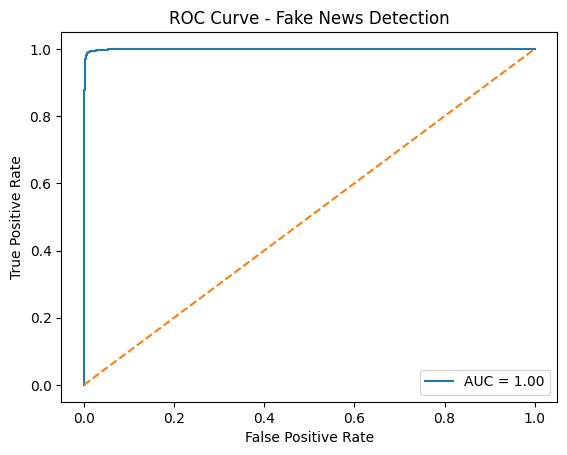

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = LR.predict_proba(xv_test)[:,1]  # probability for class 1 (real)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fake News Detection")
plt.legend()
plt.show()


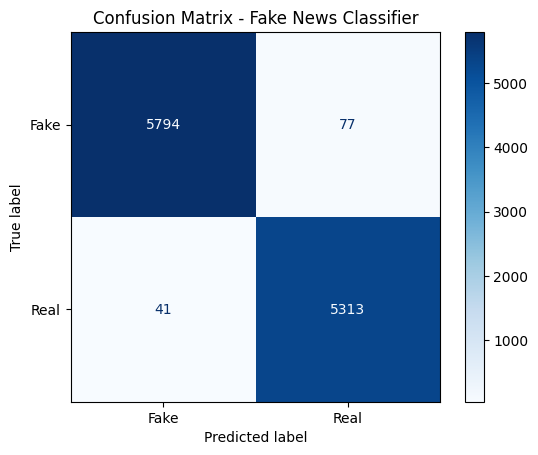

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = LR.predict(xv_test)  # or svm_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Fake News Classifier")
plt.show()


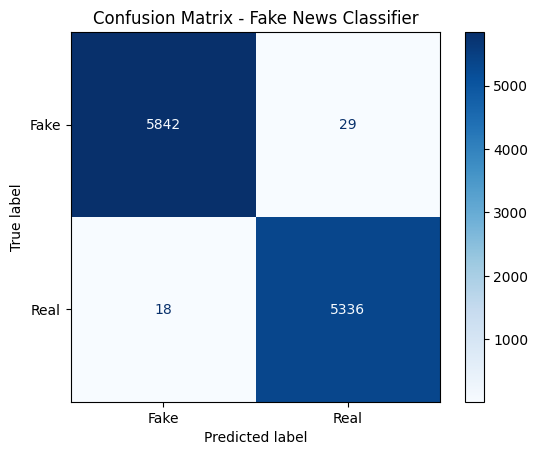

In [41]:
y_pred = svm_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Fake News Classifier")
plt.show()


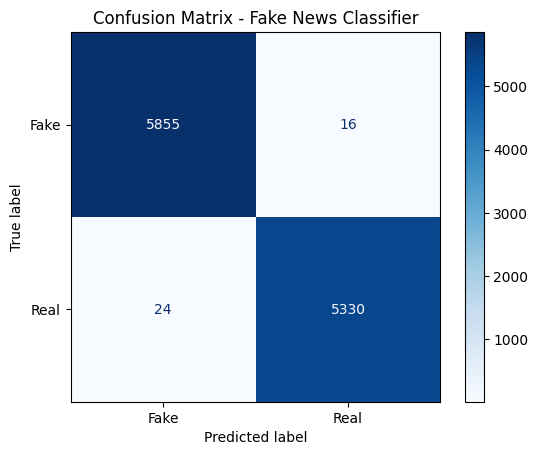

In [42]:
y_pred = dt_model.predict(xv_test)  # or svm_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Fake News Classifier")
plt.show()


feature checking and tflite download and pickel file creation

In [ ]:
import pickle

# Save model
with open('fake_news_model.pkl', 'wb') as file:
    pickle.dump(LR, file)


In [ ]:
from google.colab import files
files.download('fake_news_model.pkl')  # or .h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorization, f)


In [ ]:
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the files
with open("fake_news_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

print("✅ Model and vectorizer loaded successfully.")


✅ Model and vectorizer loaded successfully.


In [ ]:
# Check number of features
if hasattr(model, "n_features_in_"):
    print(f"Model expects: {model.n_features_in_} features")
else:
    print("Model does not have n_features_in_ attribute (may not be sklearn-based).")

if hasattr(vectorizer, "get_feature_names_out"):
    print(f"Vectorizer has: {len(vectorizer.get_feature_names_out())} features")
else:
    print("Vectorizer does not expose get_feature_names_out().")


Model expects: 180859 features
Vectorizer has: 180859 features


In [ ]:
sample_text = ["Breaking news: Scientists discover a new element!"]

# Clean optional (only if used during training)
def clean_text(text):
    import re, string
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\w*\d\w*", "", text)
    return text.strip()

cleaned = clean_text(sample_text[0])
X_test = vectorizer.transform([cleaned])

print(f"Transformed input shape: {X_test.shape}")

pred = model.predict(X_test)[0]
print(f"✅ Prediction successful → Result: {pred}")


Transformed input shape: (1, 180859)
✅ Prediction successful → Result: 0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import tensorflow as tf


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import joblib

# Load your existing scikit-learn model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Extract coefficients
weights = model.coef_
bias = model.intercept_

# Create equivalent TensorFlow model
input_dim = weights.shape[1]
tf_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True)
])

# Assign weights
tf_model.layers[0].set_weights([weights.T, bias])

# Save as TensorFlow model (.h5)
tf_model.save('model_tf.h5')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Convert to TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save the .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp84qj_yvu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180859), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134992277097744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134992277098896: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import json

vocab = vectorizer.vocabulary_
with open('vocab.json', 'w') as f:
    json.dump(vocab, f)

print("✅ Saved vectorizer vocabulary as vocab.json")


✅ Saved vectorizer vocabulary as vocab.json


In [ ]:
from google.colab import files
files.download('model.tflite')
files.download('vocab.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>